In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.optimize import root
from scipy.optimize import minimize

In [20]:
#Code from ChatGPT
# dT/dt = alpha*d^2T/dx^2 + beta*C
# dC/dt = D*d^2T/dx^2 + gamma*T
#T(0,t)=T(L,t)=0,C(0,t)=C(L,t)=0 Boundaries
#Initial T(x,0)=f(x),C(x,0)=g(x)

# Parameters
L = 1.0            # Length of the rod
N = 250             # Number of cells
dx = L / N         # Cell width
alpha = 0.01       # Thermal diffusivity
D = 0.01           # Diffusion coefficient
beta = 1.0         # Coupling coefficient for temperature
gamma = 1.0        # Coupling coefficient for concentration
dt = 0.0001         # Time step size
t_end = 0.5        # End time
x = np.linspace(dx/2, L - dx/2, N)  # Cell centers



In [21]:

# T = np.sin(np.pi * x)  # Initial temperature distribution
# C = np.cos(np.pi * x)  # Initial concentration distribution

# T = np.sin(x)
# C = np.cos(x)



# T  = np.ones((N,))
# C  = np.ones((N,))

T = []
C =[]
# Time loop

T.append(np.sin(np.pi*x))  # Initial temperature distribution
C.append(np.cos(np.pi*x))  # Initial concentration distribution
# T.append(np.ones((N,)))
# C.append(np.ones((N,)))

t = 0.0
time_step = 0

while t < t_end:
    # Compute fluxes
    T_flux = alpha * (np.roll(T[time_step], -1) - 2 * T[time_step] + np.roll(T[time_step], 1)) / dx**2
    C_flux = D * (np.roll(C[time_step], -1) - 2 * C[time_step] + np.roll(C[time_step], 1)) / dx**2

    # Update equations
    T_new = T[time_step] + dt * (T_flux + beta * C[time_step])
    C_new = C[time_step] + dt * (C_flux + gamma * T[time_step])

    # Apply boundary conditions (Dirichlet: T = 0, C = 0 at boundaries)
    T_new[0] = T_new[-1] = 0
    C_new[0] = C_new[-1] = 0

    
    errorT = np.sqrt(np.mean(np.square(T[time_step]-T_new)))
    errorC = np.sqrt(np.mean(np.square(C[time_step]-C_new)))


    T_residual = (T_new - T[time_step]) / dt - T_flux - beta * C[time_step]
    C_residual = (C_new - C[time_step]) / dt - C_flux - gamma * T[time_step]

    time_step+= 1

    # Update variables
    T.append(T_new)
    C.append(C_new)
    t += dt
    
    # print(np.mean(errorT))
    # print(np.mean(errorC))

print(np.mean(T_residual))    
print(np.mean(C_residual))

-0.0684571414832295
-0.031635529815711376


In [31]:
np.array(T).shape

(5002, 250)

In [22]:
T_np = np.array(C)

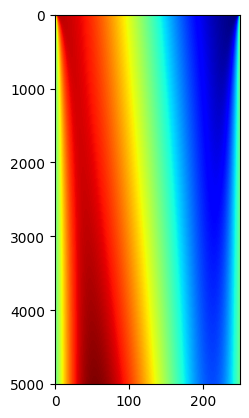

In [30]:

plt.imshow(C,cmap='jet',aspect = 0.1)
# plt.plot(C[500])

ValueError: x and y must have same first dimension, but have shapes (250,) and (1001, 250)

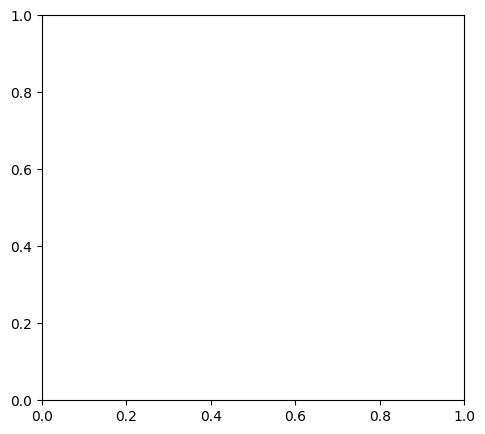

In [39]:

# Plot results
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(x, T, label='Temperature')
# plt.xlabel('Position')
# plt.ylabel('Temperature')
# plt.title('Temperature Distribution')
# plt.grid(True)
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(x, C, label='Concentration', color='orange')
# plt.xlabel('Position')
# plt.ylabel('Concentration')
# plt.title('Concentration Distribution')
# plt.grid(True)
# plt.legend()

# plt.tight_layout()
# plt.show()